# Story - 6 : What Is The State of Food Security and Nutrition in the US

### Brandon Chung
### 11/30/2025

## Introduction

In this analysis I will be exploring the state of Food Security and Nutrition in the US and the correlations that exist between poverty and food insecurity / starvation and malnutrition.  

In [71]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mticker


## Data Preprocessing

### Food Security Data

- Food secure - households had access at all times enough food for an active healthy life for all household members.

- Food-insecure - households are uncertain of having or being able to aquire at some time during the year, enough food to meet the needs of all members.

- Very low food security - households are food insecure to the extend that normal eating patterns of some household members are disrupted at times during the year, with self-reported intake below levels considered adequate.


In [28]:
# food security data located via excel download from the USDA Economic Research Service: https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-us/interactive-charts-and-highlights

# reading in food security data
foodsecurity_all_hh = pd.read_excel('foodsecurity.xlsx', sheet_name='Food security, all households',index_col=None)

foodsecurity_hh_with_children = pd.read_excel('foodsecurity.xlsx', sheet_name='Food security HHs with children',index_col=None)

foodsecurity_child_security_trends = pd.read_excel('foodsecurity.xlsx', sheet_name='Child food security trends',index_col=None)

foodsecurity_edu_emp_disability = pd.read_excel('foodsecurity.xlsx', sheet_name='Educ, emp, disability',index_col=None)

foodsecurity_by_state = pd.read_excel('foodsecurity.xlsx', sheet_name='Food security by State',index_col=None)

In [93]:

foodsecurity_all_hh.head()

,Year,Category,Subcategory,Sub-subcategory,Total,"Food secure-1,000",Food secure-percent,"Food insecure-1,000",Food insecure-percent,"Low food security-1,000",Low food security-percent,"Very low food security-1,000",Very low food security-percent
0,2001,All households,NaN,NaN,107824,96303,89.3,11521,10.7,8010,7.4,3511,3.3
1,2001,Household composition,With children < 18 years,NaN,38330,32141,83.9,6189,16.1,4744,12.4,1445,3.8
2,2001,Household composition,With children < 18 years,With children < 6 years,16858,13920,82.6,2938,17.4,2304,13.7,634,3.8
3,2001,Household composition,With children < 18 years,Married-couple families,26182,23389,89.3,2793,10.7,2247,8.6,546,2.1
4,2001,Household composition,With children < 18 years,"Female head, no spouse",9080,6185,68.1,2895,31.9,2101,23.1,794,8.7


In [30]:
def midpoint_year(val):
    # Normalize any en dash or em dash to a simple hyphen
    val = str(val).replace("–", "-").replace("—", "-").strip()
    if "-" in val:
        start, end = val.split("-")
        return (int(start) + int(end)) // 2
    return int(val)

foodsecurity_by_state["Year"] = foodsecurity_by_state["Year"].apply(midpoint_year)

# Ensure Year is a string and strip whitespace
foodsecurity_by_state['Year'] = foodsecurity_by_state['Year'].astype(str).str.strip()
foodsecurity_by_state.columns = foodsecurity_by_state.columns.str.strip()

# Function to compute midpoint year
def midpoint_year(val):
    if "-" in val:
        start, end = val.split("-")
        return (int(start) + int(end)) // 2
    return int(val)  # if already a single year

# Apply function to Year column
foodsecurity_by_state['Year'] = foodsecurity_by_state['Year'].apply(midpoint_year)

# removing State rows where State is 'United States'
foodsecurity_by_state = foodsecurity_by_state[foodsecurity_by_state['State'] != 'U.S. total']

### Snap Costs Data

In [31]:
# SNAP costs data located via excel download from the USDA Food and Nutrition Service: https://www.fns.usda.gov/pd/supplemental-nutrition-assistance-program-snap

# reading in SNAP costs data

SNAP_costs = pd.read_excel('snap.xlsx', skiprows=2,index_col=None)

# removing footers
SNAP_costs = SNAP_costs[:-4]

# removing unnecessary columns
SNAP_costs = SNAP_costs[['Fiscal Year', 'Average Participation (Thousands)', 'Average Benefit Per Person 1] (Dollars)', 'Total Costs (Millions of Dollars)']]

# renaming columns for clarity
SNAP_costs = SNAP_costs.rename(columns={'Fiscal Year': 'Year', 'Average Participation (Thousands)': 'Avg_Participation_Thousands', 'Average Benefit Per Person 1] (Dollars)': 'Avg_Benefit_Per_Person_Dollars', 'Total Costs (Millions of Dollars)': 'Total_Costs_Millions'})

In [32]:
SNAP_costs.head()

,Year,Avg_Participation_Thousands,Avg_Benefit_Per_Person_Dollars,Total_Costs_Millions
0,1969,2878.0,6.63,250.5
1,1970,4340.0,10.55,576.9
2,1971,9368.0,13.55,1575.9
3,1972,11109.0,13.48,1866.7
4,1973,12166.0,14.60,2207.4


### WIC Costs Data

In [33]:
# WIC costs data located via excel download from the USDA Food and Nutrition Service: https://www.fns.usda.gov/pd/wic-program

# reading in WIC costs data
WIC_food_costs = pd.read_excel('wicfood_costs.xlsx', skiprows=2,index_col=None)

# removing footers
WIC_food_costs = WIC_food_costs[:-3]


In [34]:
WIC_food_costs.tail()

,State / Indian Tribe,FY 2020,FY 2021,FY 2022,FY 2023\n,FY 2024\n
96,Wyoming,2706534.0,2403875.0,3498374.0,4642950.0,5260135.0
97,Dept. of Health,2449347.0,2247387.0,3332429.0,4443436.0,5040145.0
98,Northern Arapahoe,132878.0,68468.0,106448.0,143637.0,162103.0
99,Shoshone Tribe,124309.0,88020.0,59497.0,55877.0,57887.0
100,Northern Marianas,2235313.0,2137639.0,2380225.0,2634924.0,2757733.0


In [35]:
# WIC nutrition services and administration costs

# reading in WIC nutrition services and administration costs data
WIC_nsa_costs = pd.read_excel('wicnsa_costs.xlsx', skiprows=2,index_col=None)

# removing footers
WIC_nsa_costs = WIC_nsa_costs[:-3]

In [36]:
WIC_nsa_costs.tail()

,State / Indian Tribe,FY 2020,FY 2021,FY 2022,FY 2023,FY 2024
96,Wyoming,4433414.0,4713649.0,4654545.0,5228827.0,5383674
97,Dept. of Health,3880819.0,4088583.0,3988705.0,4528630.0,4734214
98,Northern Arapahoe,311867.0,390770.0,462220.0,449078.0,384595
99,Shoshone Tribe,240728.0,234296.0,203620.0,251119.0,264865
100,Northern Marianas,1149172.0,1152951.0,1256047.0,1338125.0,1466430


### Reformating WIC cost dfs to normalize States across all dataframes into state abbreviations

In [37]:
# Removing white spaces from column names
WIC_food_costs.columns = WIC_food_costs.columns.str.strip()
WIC_nsa_costs.columns = WIC_nsa_costs.columns.str.strip()

# Removing white spaces from "State / Indian Tribe" column
WIC_food_costs['State / Indian Tribe'] = WIC_food_costs['State / Indian Tribe'].str.strip()
WIC_nsa_costs['State / Indian Tribe'] = WIC_nsa_costs['State / Indian Tribe'].str.strip()

In [38]:
# Removing all rows where "State / Indian Tribe" is not a state and converting state names to abbreviations including district of columbia
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}
WIC_food_costs = WIC_food_costs[WIC_food_costs['State / Indian Tribe'].isin(state_abbreviations.keys())]
WIC_food_costs['State / Indian Tribe'] = WIC_food_costs['State / Indian Tribe'].map(state_abbreviations)

WIC_nsa_costs = WIC_nsa_costs[WIC_nsa_costs['State / Indian Tribe'].isin(state_abbreviations.keys())]
WIC_nsa_costs['State / Indian Tribe'] = WIC_nsa_costs['State / Indian Tribe'].map(state_abbreviations)

In [39]:
WIC_nsa_costs.head()

,State / Indian Tribe,FY 2020,FY 2021,FY 2022,FY 2023,FY 2024
0,AL,26429036.0,25036750.0,25483622.0,30506745.0,31048222
1,AK,7329353.0,7289711.0,6120065.0,5975244.0,6828992
3,AZ,42866261.0,43025093.0,43010011.0,46072833.0,50032081
7,AR,21275312.0,20139184.0,23149401.0,24716916.0,24118734
8,CA,327058361.0,326237173.0,329202996.0,340934334.0,357969002


In [40]:
# Renaming column headers for clarity
WIC_food_costs = WIC_food_costs.rename(columns={'State / Indian Tribe': 'State', 'FY 2020': '2020', 'FY 2021': '2021', 'FY 2022': '2022', 'FY 2023': '2023','FY 2024': '2024'})
WIC_nsa_costs = WIC_nsa_costs.rename(columns={'State / Indian Tribe': 'State', 'FY 2020': '2020', 'FY 2021': '2021', 'FY 2022': '2022', 'FY 2023': '2023','FY 2024': '2024'})

### Melting and combining WIC food and nsa costs into one dataframe

In [41]:
# Melting the WIC food costs dataframe
WIC_food_costs_melted = WIC_food_costs.melt(id_vars=['State'], var_name='Year', value_name='Food_Costs')
WIC_food_costs_melted['Food_Costs'] = pd.to_numeric(WIC_food_costs_melted['Food_Costs'], errors='coerce')
WIC_food_costs_melted.head()


,State,Year,Food_Costs
0,AL,2020,53799208.0
1,AK,2020,8351829.0
2,AZ,2020,52542294.0
3,AR,2020,24772350.0
4,CA,2020,464985899.0


In [42]:
# Melting the WIC nsa costs dataframe
WIC_nsa_costs_melted = WIC_nsa_costs.melt(id_vars=['State'], var_name='Year', value_name='NSA_Costs')
WIC_nsa_costs_melted['NSA_Costs'] = pd.to_numeric(WIC_nsa_costs_melted['NSA_Costs'], errors='coerce')
WIC_nsa_costs_melted.head()

,State,Year,NSA_Costs
0,AL,2020,26429036.0
1,AK,2020,7329353.0
2,AZ,2020,42866261.0
3,AR,2020,21275312.0
4,CA,2020,327058361.0


In [43]:
# Combining WIC food and nsa costs into one dataframe
WIC_costs_combined = pd.merge(WIC_food_costs_melted, WIC_nsa_costs_melted, on=['State', 'Year'])
WIC_costs_combined['Total_Costs'] = WIC_costs_combined['Food_Costs'] + WIC_costs_combined['NSA_Costs']
WIC_costs_combined.head()

,State,Year,Food_Costs,NSA_Costs,Total_Costs
0,AL,2020,53799208.0,26429036.0,80228244.0
1,AK,2020,8351829.0,7329353.0,15681182.0
2,AZ,2020,52542294.0,42866261.0,95408555.0
3,AR,2020,24772350.0,21275312.0,46047662.0
4,CA,2020,464985899.0,327058361.0,792044260.0


In [44]:
# State GDP data located via excel download from the Bureau of Economic Analysis: https://apps.bea.gov/itable/?ReqID=70&step=1&_gl=1*1p07twe*_ga*MTg2NDg0NTk0NC4xNzQ1ODc4NzM5*_ga_J4698JNNFT*czE3NjQ1Mjg0NDQkbzIkZzAkdDE3NjQ1Mjg0NDQkajYwJGwwJGgw#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCI2MDAiXSxbIk1ham9yX0FyZWEiLCIwIl0sWyJTdGF0ZSIsWyIwIl1dLFsiQXJlYSIsWyJYWCJdXSxbIlN0YXRpc3RpYyIsWyI0IiwiMTAiLCIxNSJdXSxbIlVuaXRfb2ZfbWVhc3VyZSIsIkxldmVscyJdLFsiWWVhciIsWyItMSJdXSxbIlllYXJCZWdpbiIsIi0xIl0sWyJZZWFyX0VuZCIsIi0xIl1dfQ==

state_gdp = pd.read_excel('state_gdp.xlsx', skiprows=5,index_col=None)

# removing footer rows
state_gdp = state_gdp[:-3]

# removing rows where 'LineCode' is NaN
state_gdp = state_gdp[state_gdp['LineCode'].notna()]

# removing unnecessary columns
state_gdp = state_gdp[['GeoName', 'Description', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']]

# removing rows where 'GeoName' is not a state and converting state names to abbreviations including district of columbia
state_gdp = state_gdp[state_gdp['GeoName'].isin(state_abbreviations.keys())]
state_gdp['GeoName'] = state_gdp['GeoName'].map(state_abbreviations)

# melting to have years in one column
state_gdp = state_gdp.melt(id_vars=['GeoName', 'Description'], var_name='Year', value_name='Value')
state_gdp['Value'] = pd.to_numeric(state_gdp['Value'], errors='coerce')

#pivoting wider to have descriptions as columns
state_gdp = state_gdp.pivot_table(index=['GeoName', 'Year'], columns='Description', values='Value').reset_index()

# removing description column name from columns
state_gdp.columns.name = None

# removing white spaces from column names
state_gdp.columns = state_gdp.columns.str.strip()

# renmaming columns for clarity
state_gdp = state_gdp.rename(columns={'GeoName': 'State', 'Gross domestic product (GDP)': 'GDP (Millions)', 'Per capita personal income 6': 'Per Capita Income (Dollars)', 'Total employment (number of jobs)': 'Total Employment'})

c:\Users\chung\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [45]:
state_gdp.head()

,State,Year,GDP (Millions),Per Capita Income (Dollars),Total Employment
0,AK,2007,49456.4,43747.0,439844.0
1,AK,2008,55246.7,47800.0,443602.0
2,AK,2009,50165.9,47211.0,442505.0
3,AK,2010,53654.0,49543.0,443940.0
4,AK,2011,56912.3,52415.0,450420.0


## Data Visualizations

In [46]:
foodsecurity_by_state.head()

,Year,State,Food insecurity prevalence,Food insecurity–margin of error,Very low food security prevalence,Very low food security–margin of error
1,2007,AK,11.6,1.66,4.4,1.31
2,2007,AL,13.3,1.66,5.4,1.02
3,2007,AR,15.9,3.19,5.6,1.50
4,2007,AZ,13.2,1.51,4.9,0.84
5,2007,CA,12.0,0.74,4.3,0.48


In [47]:
# Visualizing change in food insecurity from 2007 to 2022 using a map of the US

map_data = foodsecurity_by_state[foodsecurity_by_state['Year'].isin([2007, 2022])]
map_data = map_data.pivot(index='State', columns='Year', values='Food insecurity prevalence').reset_index()
map_data['Change'] = map_data[2022] - map_data[2007]

fig = px.choropleth(
    map_data.reset_index(),   
    locations="State",        
    locationmode="USA-states",
    color="Change",
    color_continuous_scale="RdBu",
    scope="usa",
    title="Change in Food Insecurity Rate by State (2007–2022)"
)

fig.show()



In [ ]:
# Selecting the top 10 states with the greatest increases of food insecurity rate changes from 2007 to 2022

change_df = (
    foodsecurity_by_state
    .groupby("State")
    .agg(
        earliest_year=("Year", "min"),
        latest_year=("Year", "max"),
        earliest_value=("Food insecurity prevalence", "first"),
        latest_value=("Food insecurity prevalence", "last")
    )
)

# Calculate change
change_df["Change"] = change_df["latest_value"] - change_df["earliest_value"]

print(change_df.head())


top_10_states = change_df.nlargest(10, 'Change').index.tolist()
top_10_states

       earliest_year  latest_year  earliest_value  latest_value  Change
State                                                                  
AK              2007         2022            11.6          10.4    -1.2
AL              2007         2022            13.3          11.5    -1.8
AR              2007         2022            15.9          18.9     3.0
AZ              2007         2022            13.2          11.8    -1.4
CA              2007         2022            12.0          11.4    -0.6


['LA', 'WY', 'AR', 'NE', 'DE', 'KY', 'ND', 'WV', 'OK', 'VA']

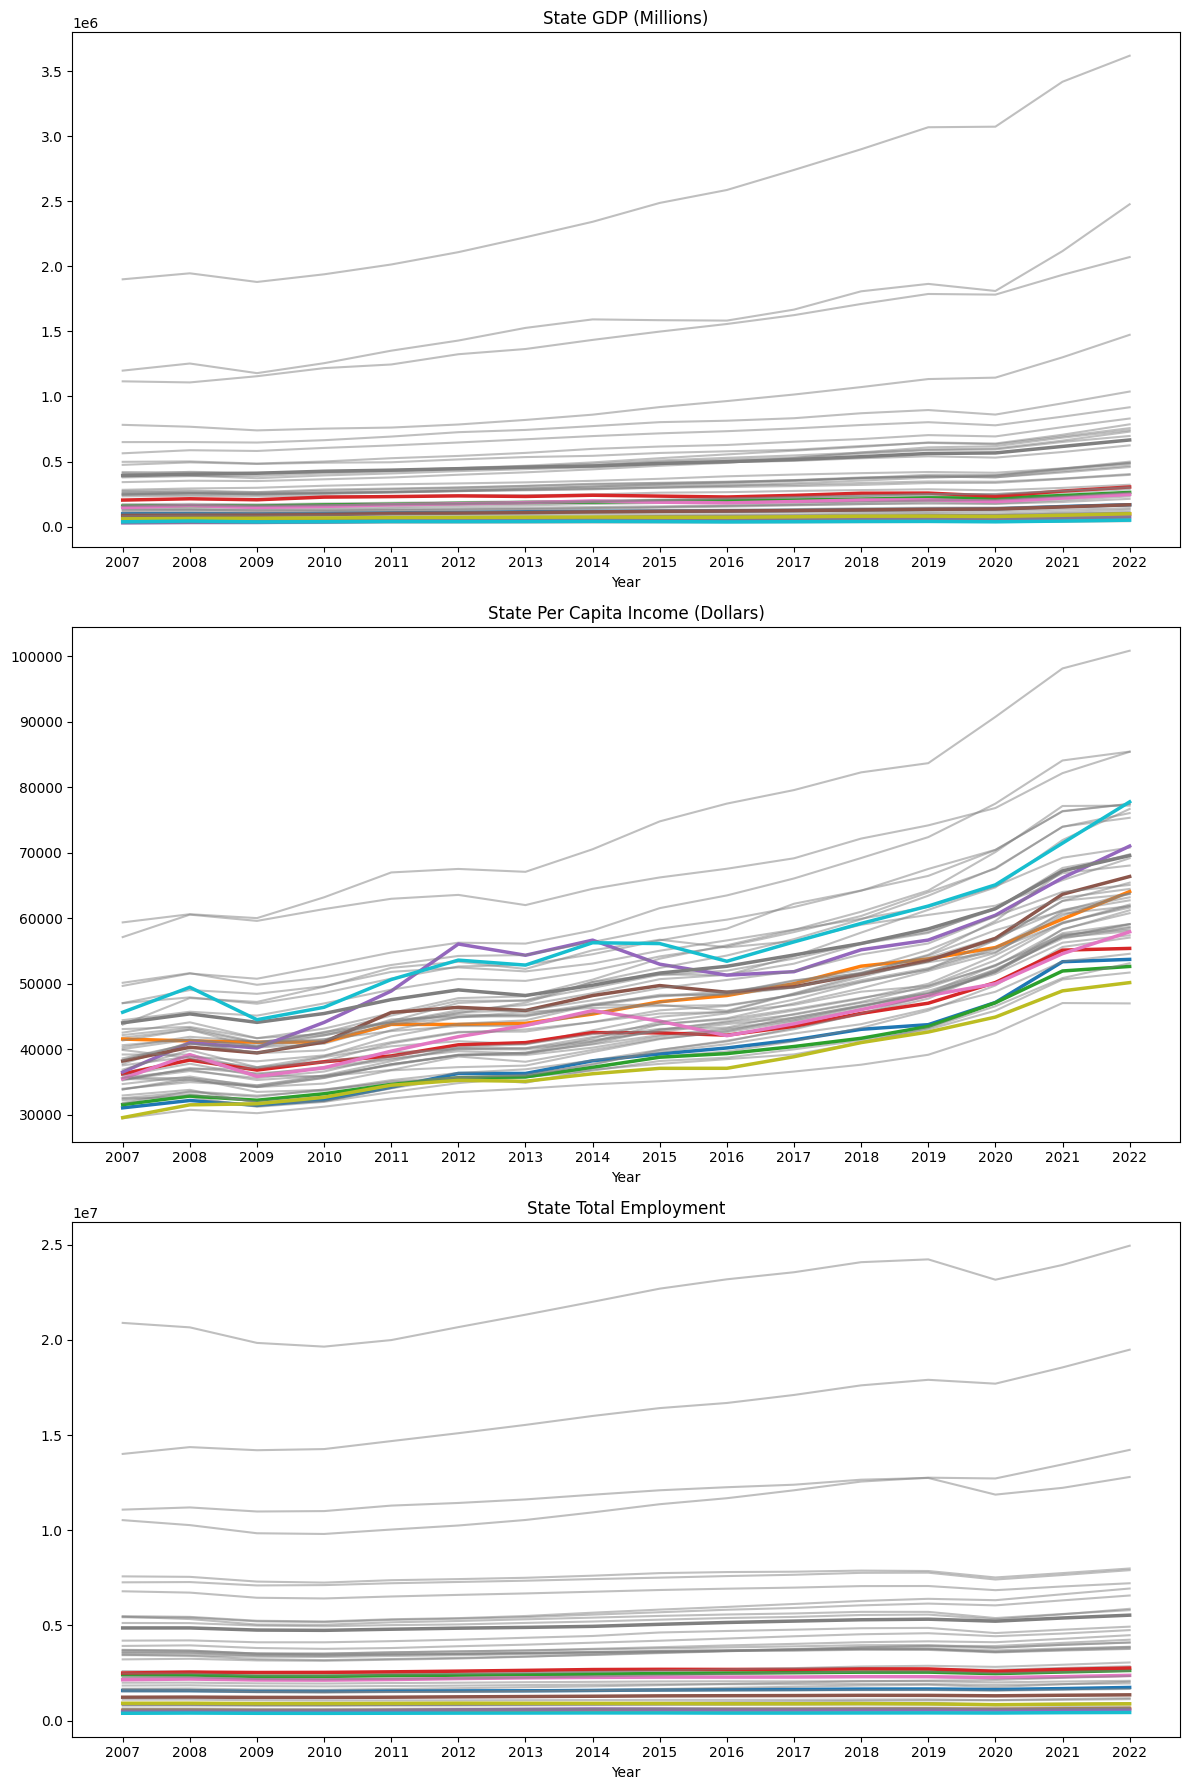

In [106]:
# Visualizing state_gdp GDP (Millions), Per Capita Income (Dollars), and Total Employment for all states and highlighting the top 5 states with the lowest food insecurity rate changes from 2007 to 2022
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
for state in state_gdp['State'].unique():
    state_data = state_gdp[state_gdp['State'] == state]
    if state in top_10_states:
        axes[0].plot(state_data['Year'], state_data['GDP (Millions)'], label=state, linewidth=2.5)
        axes[1].plot(state_data['Year'], state_data['Per Capita Income (Dollars)'], label=state, linewidth=2.5)
        axes[2].plot(state_data['Year'], state_data['Total Employment'], label=state, linewidth=2.5)
    else:
        axes[0].plot(state_data['Year'], state_data['GDP (Millions)'], color='gray', alpha=0.5)
        axes[1].plot(state_data['Year'], state_data['Per Capita Income (Dollars)'], color='gray', alpha=0.5)
        axes[2].plot(state_data['Year'], state_data['Total Employment'], color='gray', alpha=0.5)
axes[0].set_title('State GDP (Millions)')
axes[0].set_xlabel('Year')
axes[1].set_title('State Per Capita Income (Dollars)')
axes[1].set_xlabel('Year')
axes[2].set_title('State Total Employment')
axes[2].set_xlabel('Year')
plt.tight_layout()
plt.show()

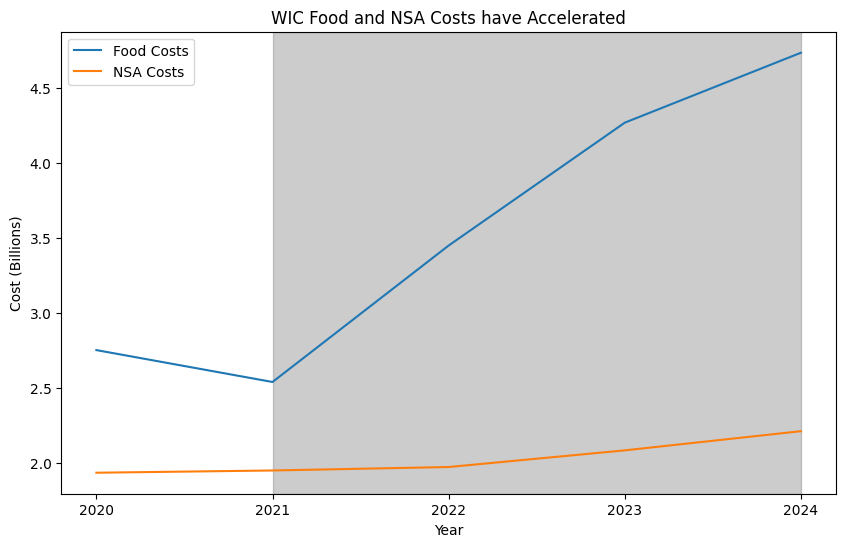

In [105]:
wic_grouped = (
    WIC_costs_combined
    .groupby("Year")[["Food_Costs", "NSA_Costs"]]
    .sum()
    .reset_index()
)

wic_grouped["Food_Costs(Billions)"] = wic_grouped["Food_Costs"] / 1_000_000_000
wic_grouped["NSA_Costs(Billions)"]  = wic_grouped["NSA_Costs"]  / 1_000_000_000

wic_grouped["Year"] = wic_grouped["Year"].astype(int)


plt.figure(figsize=(10, 6))
sns.lineplot(data=wic_grouped, x="Year", y="Food_Costs(Billions)", label="Food Costs")
sns.lineplot(data=wic_grouped, x="Year", y="NSA_Costs(Billions)", label="NSA Costs")

plt.title("WIC Food and NSA Costs have Accelerated")
plt.ylabel("Cost (Billions)")
plt.legend()

# Shade 2021–2024
plt.axvspan(2021, 2024, color="gray", alpha=0.4)

# Force x-axis ticks to be integers only
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()




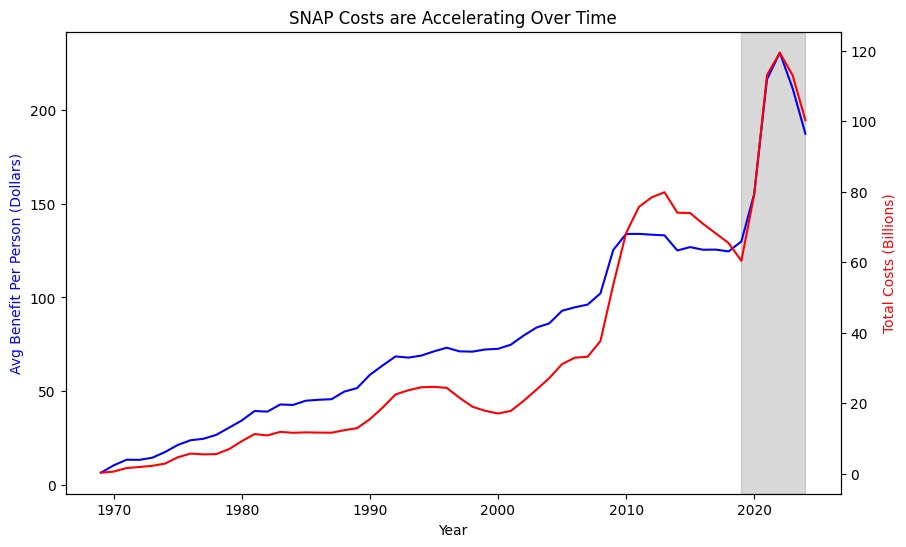

In [112]:
# Visualizing snap costs over time Avg_Benefit_Per_Person_Dollars and Total_Costs_Millions

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(
    data=SNAP_costs,
    x='Year',
    y='Avg_Benefit_Per_Person_Dollars',
    ax=ax1,
    color='blue',
    label='Avg Benefit Per Person (Dollars)',
    legend=False
)
ax1.set_ylabel('Avg Benefit Per Person (Dollars)', color='blue')

ax2 = ax1.twinx()
sns.lineplot(
    data=SNAP_costs,
    x='Year',
    y='Total_Costs_Billions',
    ax=ax2,
    color='red',
    label='Total Costs (Billions)',
    legend=False
)
ax2.set_ylabel('Total Costs (Billions)', color='red')

plt.title('SNAP Costs are Accelerating Over Time')

# Shade 2021–2024
ax1.axvspan(2019, 2024, color='gray', alpha=0.3)

plt.show()


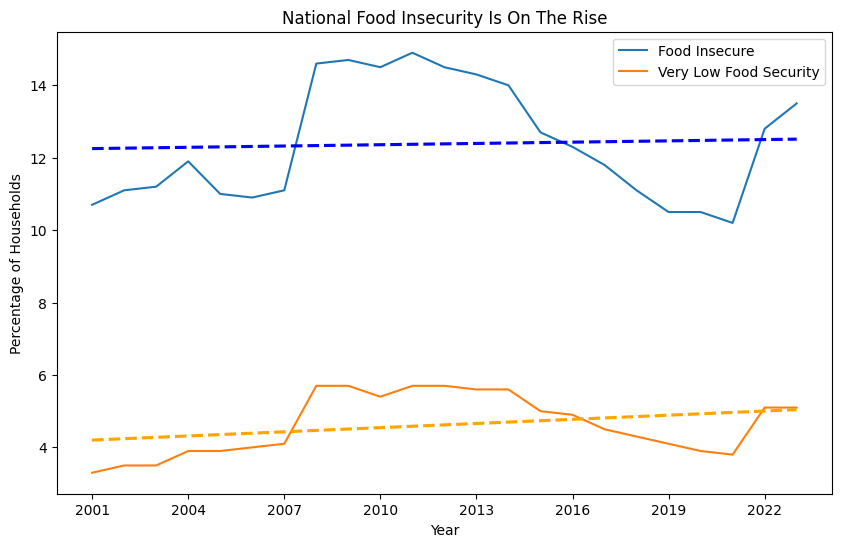

In [159]:
# Using foodsecurity_all_hh data to visualize national food insecurity trends over time

filtered = foodsecurity_all_hh.loc[
    foodsecurity_all_hh["Category"] == "All households",
    ["Year", "Food insecure-percent", "Very low food security-percent"]
]

plt.figure(figsize=(10, 6))

# Original lines
sns.lineplot(data=filtered, x="Year", y="Food insecure-percent", label="Food Insecure")
sns.lineplot(data=filtered, x="Year", y="Very low food security-percent", label="Very Low Food Security")

# Trendlines
sns.regplot(data=filtered, x="Year", y="Food insecure-percent",
            scatter=False, ci=None, color="blue", 
            line_kws={"linestyle":"--"}, label="Food Insecure Trend")

sns.regplot(data=filtered, x="Year", y="Very low food security-percent",
            scatter=False, ci=None, color="orange", 
            line_kws={"linestyle":"--"}, label="Very Low Food Security Trend")

plt.title("National Food Insecurity Is On The Rise")
plt.ylabel("Percentage of Households")
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.show()


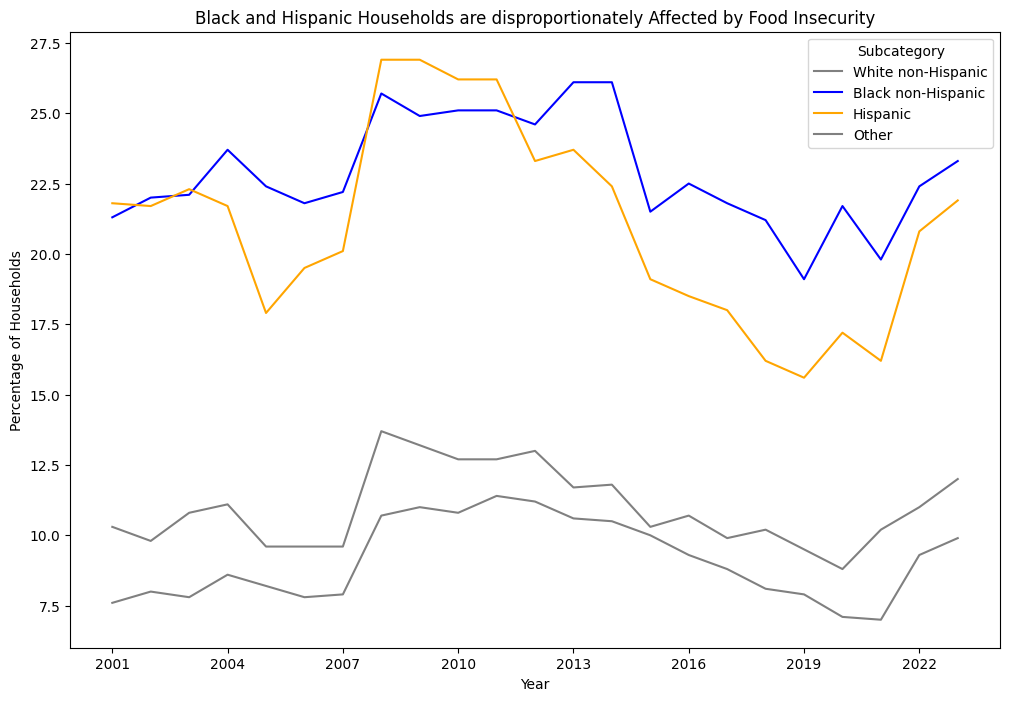

In [91]:
filtered = foodsecurity_all_hh.loc[
    foodsecurity_all_hh["Category"] == "Race/ethnicity of households",
    ["Year","Subcategory", "Food insecure-percent", "Very low food security-percent"]
]

plt.figure(figsize=(12, 8))

# Define custom colors for each subgroup
custom_palette = {
    "Black non-Hispanic": "blue",
    "Hispanic": "orange",
    "White non-Hispanic": "gray",
    "Other": "gray"
}

sns.lineplot(
    data=filtered,
    x="Year",
    y="Food insecure-percent",
    hue="Subcategory",
    palette=custom_palette
)

plt.title("Black and Hispanic Households are disproportionately Affected by Food Insecurity")
plt.ylabel("Percentage of Households")
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.show()


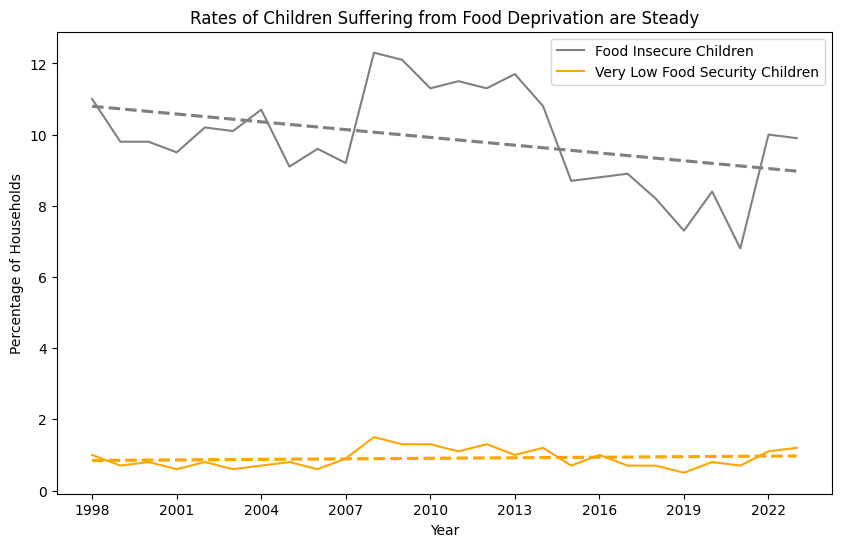

In [157]:
filtered = foodsecurity_child_security_trends.loc[
    foodsecurity_child_security_trends["Category"] == "Children - by food security status of household",
    ["Year", "Households with food-insecure children-percent", "Households with very low food security among children-percent"]
]

plt.figure(figsize=(10, 6))

# Original lines
sns.lineplot(data=filtered, x="Year", y="Households with food-insecure children-percent",
             label="Food Insecure Children", color="gray")
sns.lineplot(data=filtered, x="Year", y="Households with very low food security among children-percent",
             label="Very Low Food Security Children", color="orange")

# Trendlines (linear regression fits)
sns.regplot(data=filtered, x="Year", y="Households with food-insecure children-percent",
            scatter=False, ci=None, color="gray", line_kws={"linestyle":"--"}, label="Trend (Food Insecure Children)")
sns.regplot(data=filtered, x="Year", y="Households with very low food security among children-percent",
            scatter=False, ci=None, color="orange", line_kws={"linestyle":"--"}, label="Trend (Very Low Food Security Children)")

plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.ylabel("Percentage of Households")
plt.title("Rates of Children Suffering from Food Deprivation are Steady")
plt.show()

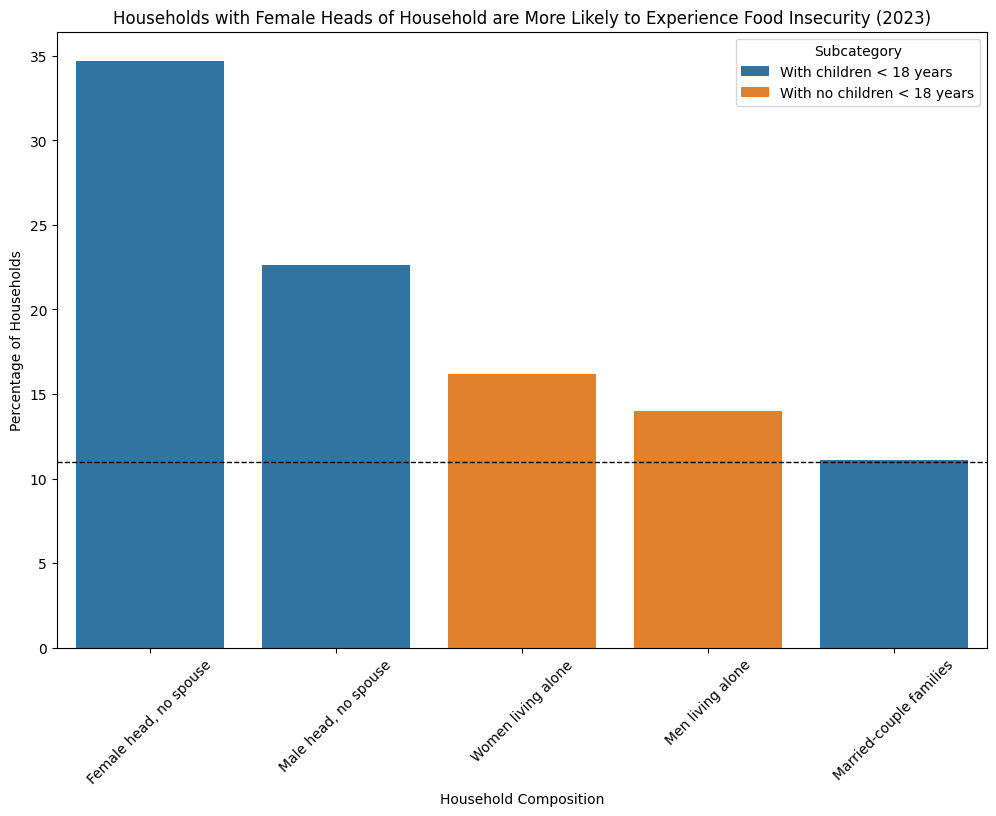

In [161]:
# Sort by Food insecure-percent descending
sorted_order = (
    filtered_2023
    .groupby("Sub-subcategory")["Food insecure-percent"]
    .mean()             
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=filtered_2023,
    x="Sub-subcategory",
    y="Food insecure-percent",
    hue="Subcategory",
    order=sorted_order   
)

plt.title("Households with Female Heads of Household are More Likely to Experience Food Insecurity (2023)")
plt.ylabel("Percentage of Households")
plt.xlabel("Household Composition")
plt.xticks(rotation=45)
plt.axhline(y=11, color="black", linestyle="--", linewidth=1) 
plt.show()


In [132]:
filtered.head(10)

,Year,Category,Subcategory,Sub-subcategory,Food insecure-percent,Very low food security-percent
4,2001,Household composition,With children < 18 years,"Female head, no spouse",31.9,8.7
5,2001,Household composition,With children < 18 years,"Male head, no spouse",15.9,3.4
9,2001,Household composition,With no children < 18 years,Women living alone,9.7,3.9
10,2001,Household composition,With no children < 18 years,Men living alone,10.4,4.5
34,2002,Household composition,With children < 18 years,"Female head, no spouse",32.0,8.7
35,2002,Household composition,With children < 18 years,"Male head, no spouse",21.9,5.9
39,2002,Household composition,With no children < 18 years,Women living alone,10.5,4.4
40,2002,Household composition,With no children < 18 years,Men living alone,11.2,5.3
64,2003,Household composition,With children < 18 years,"Female head, no spouse",31.7,8.7
65,2003,Household composition,With children < 18 years,"Male head, no spouse",21.7,5.5


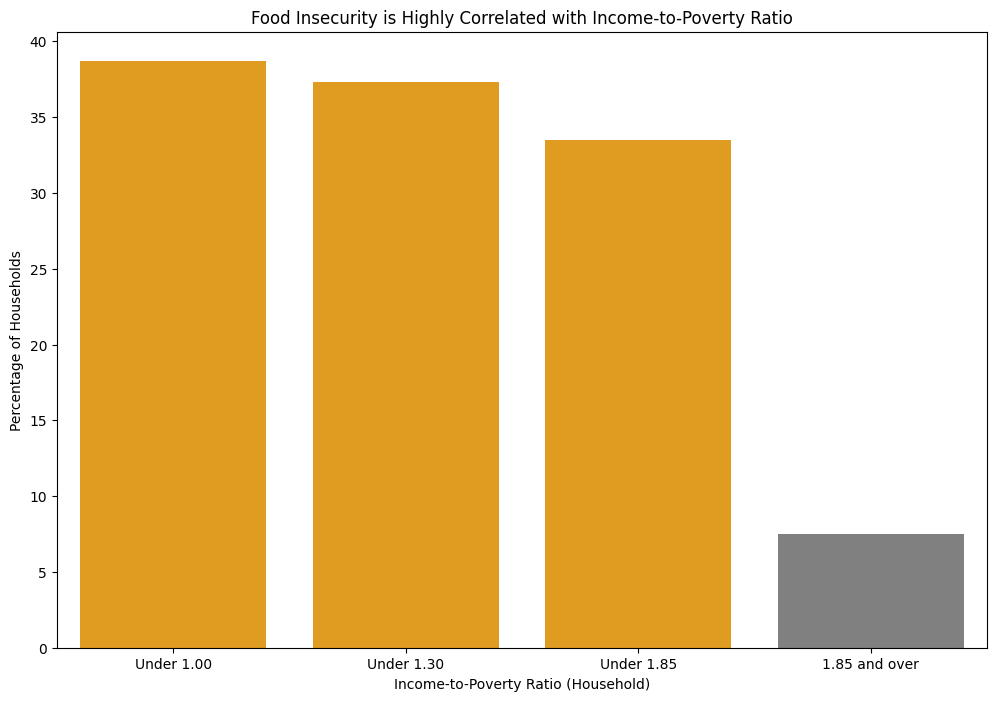

In [156]:
filtered = foodsecurity_all_hh.loc[
    foodsecurity_all_hh["Category"] == "Household income-to-poverty ratio",
    ["Year", "Subcategory", "Food insecure-percent", "Very low food security-percent"]
]

filtered = filtered[filtered["Subcategory"].isin(["Under 1.00","Under 1.30","Under 1.85", "1.85 and over"])]
filtered = filtered[filtered["Year"] == 2023]

plt.figure(figsize=(12, 8))

# Define custom palette
custom_palette = {
    "1.85 and over": "gray",
    "Under 1.00": "orange",
    "Under 1.85": "orange",
    "Under 1.30": "orange"
}

sns.barplot(
    data=filtered,
    x="Subcategory",
    y="Food insecure-percent",
    hue="Subcategory",
    palette=custom_palette
)

plt.title("Food Insecurity is Highly Correlated with Income-to-Poverty Ratio")
plt.ylabel("Percentage of Households")
plt.xlabel("Income-to-Poverty Ratio (Household)")
plt.show()
